<a href="https://colab.research.google.com/github/SJinLee/BasicStats/blob/main/textmining-naver-news-R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(rvest)

In [ ]:
base_url <- "http://news.naver.com/#"

In [ ]:
# library(polite)
# bow(
#   url = base_url,
#   user_agent = ' Mozilla/5.0 (Windows NT 6.1; WOW64; rv:12.0) Gecko/20100101 Firefox/12.0'
# )

In [ ]:
html <- read_html(base_url)

In [ ]:
category_list <- html_nodes(x=html, xpath='//*[@class="Nlist_item"]')

In [ ]:
category_link <- lapply(category_list,function(x) {html_nodes(x=x, 'a')})

In [ ]:
category <- lapply(category_link,html_text)

In [ ]:
category

[[1]]
[1] "정치"

[[2]]
[1] "경제"

[[3]]
[1] "사회"

[[4]]
[1] "생활/문화"

[[5]]
[1] "IT/과학"

[[6]]
[1] "세계"

[[7]]
[1] "오피니언"

[[8]]
[1] "TV"

[[9]]
[1] "팩트체크"

In [ ]:
category_url <- lapply(category_link,function(x) {html_attr(x,'href')})

In [ ]:
article <- data.frame()
for (i in 1:6) {
    cat <- category[[i]]
    caturl <- category_url[[i]]
    catdata <- read_html(caturl)
    article_div <- html_nodes(x=catdata,xpath='//*[@class="sh_text"]')
    article_link <- lapply(article_div,function(x) {html_nodes(x=x,'a')[[1]]})
    article_title <- lapply(article_link,html_text)
    article_url <-  lapply(article_link,function(x) {html_attr(x=x,'href')})
    article_body <- lapply(article_url,read_html)
    article_content <- lapply(article_body,
                              function(x) {
                                  html_nodes(x=x,
                                             xpath='//*[@class="newsct_article _article_body"]')
                              })
    article_text <- lapply(article_content,html_text)
    df <- data.frame(cbind(category=cat,
                           title=unlist(article_title),
                           url=unlist(article_url),
                           text=unlist(article_text)))
    article <- rbind(article,df)
}

In [ ]:
table(article[['category']])


  IT/과학      경제      사회 생활/문화      세계      정치 
        8        10        10         8        10        10 

### khaiii 사용법
1. install.packages("reticulate") 
2. library(reticulate) 
3. khaiii <- import('khaiii')
4. api <- khaiii$KhaiiiApi()

5. a <- api$analyze("데이터 분석을 공부하고 있는 개발자")

In [ ]:
library(reticulate)
khaiii <- import('khaiii')
api <- khaiii$KhaiiiApi()

In [ ]:
a <- api$analyze("데이터 분석을 공부하고 있는 개발자")

In [ ]:
for (word in a) {
    s <- paste(word$lex,": ",sep='')
    t <- unlist(Map(function(x){paste(x$lex,x$tag,sep='/')},word$morphs))
    s <- paste(s, paste(t,collapse=','),sep='')
    print(s)
}

[1] "데이터: 데이터/NNG"
[1] "분석을: 분석/NNG,을/JKO"
[1] "공부하고: 공부/NNG,하/XSV,고/EC"
[1] "있는: 있/VX,는/ETM"
[1] "개발자: 개발자/NNG"


<table> <thead> <tr> <th>분류</th> <th>품사</th> <th>설명</th> <th>분류</th> <th>품사</th> <th>설명</th> </tr> </thead> <tbody> <tr> <td>체언</td> <td>NNG</td> <td>일반 명사</td> <td>의존 형태</td> <td>EP</td> <td>선어말 어미</td> </tr> <tr> <td>체언</td> <td>NNP</td> <td>고유 명사</td> <td>의존 형태</td> <td>EF</td> <td>종결 어미</td> </tr> <tr> <td>체언</td> <td>NNB</td> <td>의존 명사</td> <td>의존 형태</td> <td>EC</td> <td>연결 어미</td> </tr> <tr> <td>체언</td> <td>NP</td> <td>대명사</td> <td>의존 형태</td> <td>ETN</td> <td>명사형 전성 어미</td> </tr> <tr> <td>체언</td> <td>NR</td> <td>수사</td> <td>의존 형태</td> <td>ETM</td> <td>관형형 전성 어미</td> </tr> <tr> <td>용언</td> <td>VV</td> <td>동사</td> <td>의존 형태</td> <td>XPN</td> <td>체언 접두사</td> </tr> <tr> <td>용언</td> <td>VA</td> <td>형용사</td> <td>의존 형태</td> <td>XSN</td> <td>명사 파생 접미사</td> </tr> <tr> <td>용언</td> <td>VX</td> <td>보조 용언</td> <td>의존 형태</td> <td>XSV</td> <td>동사 파생 접미사</td> </tr> <tr> <td>용언</td> <td>VCP</td> <td>긍정 지정사</td> <td>의존 형태</td> <td>XSA</td> <td>형용사 파생 접미사</td> </tr> <tr> <td>용언</td> <td>VCN</td> <td>부정 지정사</td> <td>의존 형태</td> <td>XR</td> <td>어근</td> </tr> <tr> <td>수식언</td> <td>MM</td> <td>관형사</td> <td>기호</td> <td>SF</td> <td>마침표, 물음표, 느낌표</td> </tr> <tr> <td>수식언</td> <td>MAG</td> <td>일반 부사</td> <td>기호</td> <td>SP</td> <td>쉼표, 가운뎃점, 콜론, 빗금</td> </tr> <tr> <td>수식언</td> <td>MAJ</td> <td>접속 부사</td> <td>기호</td> <td>SS</td> <td>따옴표, 괄호표, 줄표</td> </tr> <tr> <td>독립언</td> <td>IC</td> <td>감탄사</td> <td>기호</td> <td>SE</td> <td>줄임표</td> </tr> <tr> <td>관계언</td> <td>JKS</td> <td>주격 조사</td> <td>기호</td> <td>SO</td> <td>붙임표(물결, 숨김, 빠짐)</td> </tr> <tr> <td>관계언</td> <td>JKC</td> <td>보격 조사</td> <td>기호</td> <td>SL</td> <td>외국어</td> </tr> <tr> <td>관계언</td> <td>JKG</td> <td>관형격 조사</td> <td>기호</td> <td>SH</td> <td>한자</td> </tr> <tr> <td>관계언</td> <td>JKO</td> <td>목적격 조사</td> <td>기호</td> <td>SW</td> <td>기타 기호(논리, 수학 기호, 화폐 기호 등)</td> </tr> <tr> <td>관계언</td> <td>JKB</td> <td>부사격 조사</td> <td>기호</td> <td><strong>SWK</strong></td> <td>한글 자소</td> </tr> <tr> <td>관계언</td> <td>JKV</td> <td>호격 조사</td> <td>기호</td> <td>SN</td> <td>숫자</td> </tr> <tr> <td>관계언</td> <td>JKQ</td> <td>인용격 조사</td> <td>추정</td> <td><strong>ZN</strong></td> <td>분석 불능(명사 추정)</td> </tr> <tr> <td>관계언</td> <td>JX</td> <td>보조사</td> <td>추정</td> <td><strong>ZV</strong></td> <td>분석 불능(용언 추정)</td> </tr> <tr> <td>관계언</td> <td>JC</td> <td>접속 조사</td> <td>추정</td> <td><strong>ZZ</strong></td> <td>분석 불능(기타)</td> </tr> </tbody> </table>

In [ ]:
extractNoun <- function(txt) {
    a = api$analyze(txt)
    noun <- c()
    for (token in a) {
        tags <- unlist(Map(function(x){x$tag},token$morphs))
        lexs <- unlist(Map(function(x){x$lex},token$morphs))
        noun <- c(noun,lexs[tags=='NNG'])
    }
    paste(noun,collapse=' ')
}

In [ ]:
nouns <- Map(extractNoun,article[['text']]) 

In [ ]:
library(tm)

Loading required package: NLP



In [ ]:
source <- VectorSource(nouns)

In [ ]:
corpus <- VCorpus(source)

In [ ]:
tdm <- TermDocumentMatrix(corpus)

In [ ]:
m <- as.matrix(tdm)

In [ ]:
freqs <- rowSums(m)

In [ ]:
freqs <- sort(freqs,decreasing=T)

In [ ]:
freqs[1:10]

대통령 서비스 위원회 오염수 지난달 미사일 플랫폼 피해자 관계자 머스크 
    45     34     28     27     26     22     16     15     13     13

In [ ]:
library(wordcloud)

Loading required package: RColorBrewer



In [ ]:
library(repr)

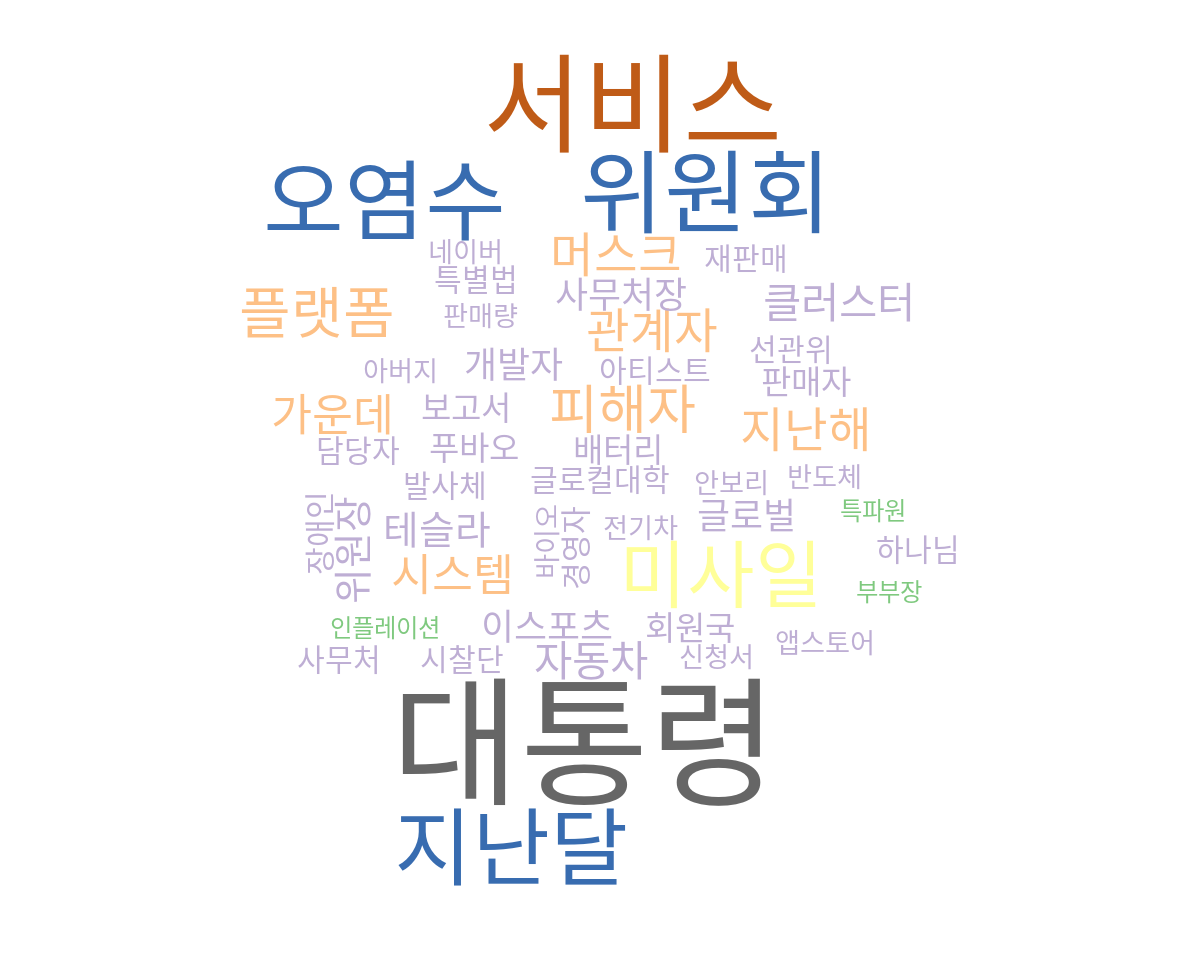

In [ ]:
options(repr.plot.width=10, repr.plot.height=8)
pal<-brewer.pal(8, "Accent")
wordcloud(names(freqs), freqs, max.words=50, scale=c(7, 0.5), colors=pal)